# Exploratory Analysis

                                                                                                                                                                                                                                                             translation
0                                                                                                                                                                                   {'en': 'What's the name of the movie', 'hi_ng': 'film ka kya naam hai', 'source': 1}
1  {'en': 'Hi, the rotten tomatoes score is great but the meta critic score seems a little low a movie of this quality. ', 'hi_ng': 'namaste, sada hua tomatoes score mahaan hai, lekin meta critic score is gunavatta kee philm se thoda kam lagata hai.', 'source': 1}
2                                                                                                                                             {'en': 'Do you think you will like the movie', 'hi_ng': 'kya aa

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


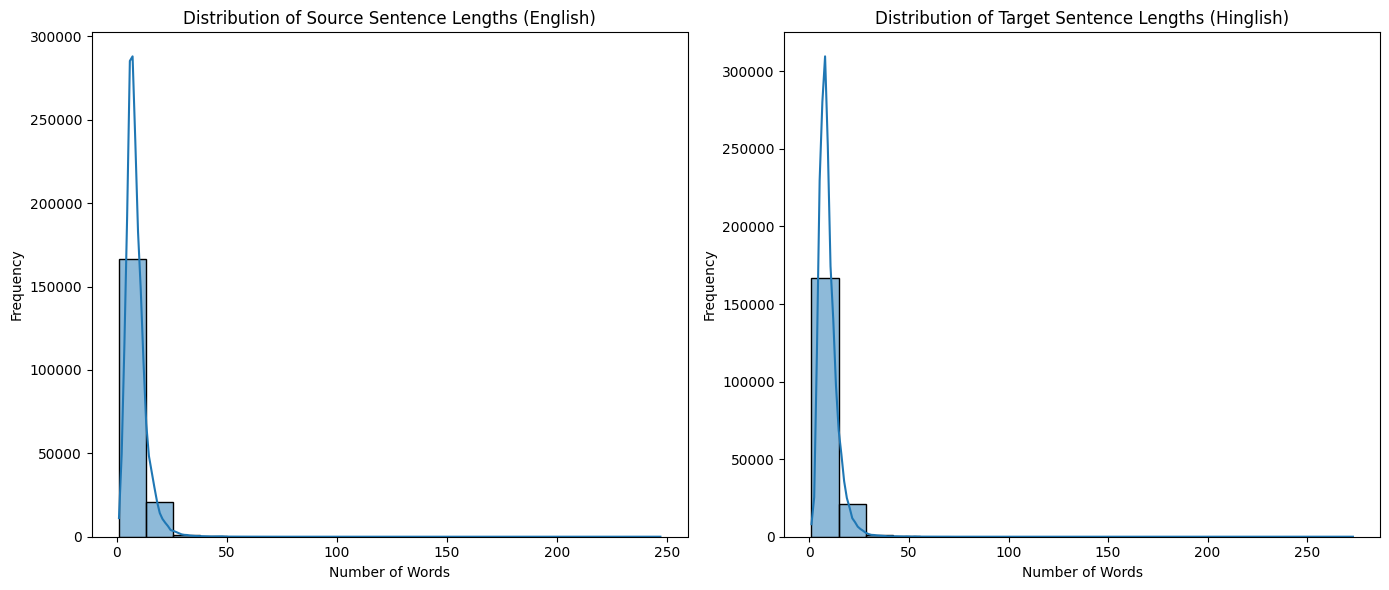

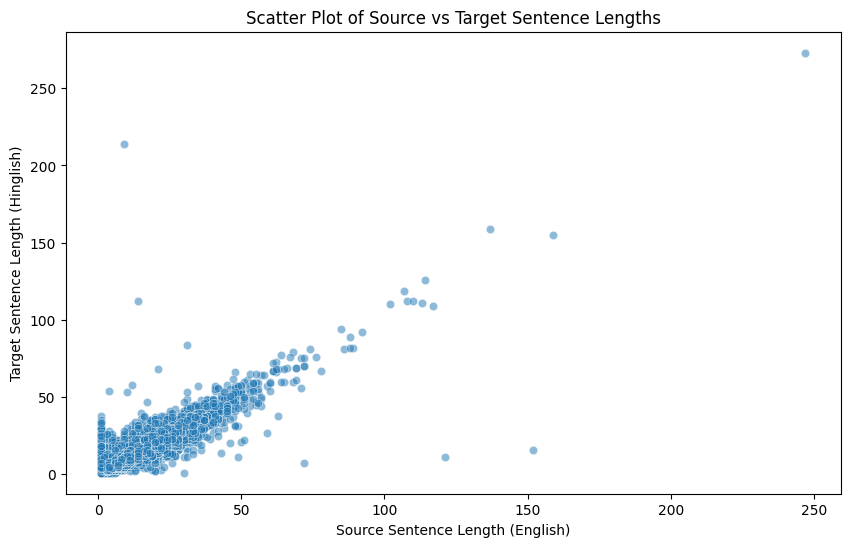

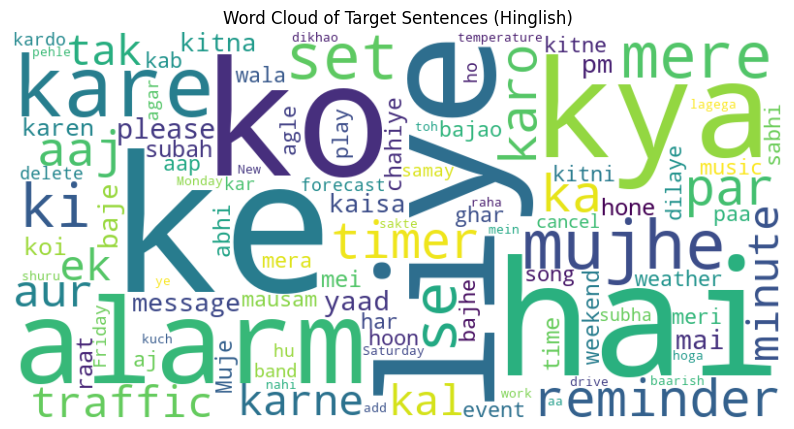

In [3]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = load_dataset('findnitai/english-to-hinglish')

# Convert the dataset to Pandas DataFrame for easier exploration
data_df = pd.DataFrame(dataset['train'])

# Display the first few rows to understand the dataset structure
print(data_df.head().to_string())

# Basic Information about the Dataset
print("\nDataset Information:")
data_df.info()

# Checking for Null values
print("\nNumber of Null values in each column:")
print(data_df.isnull().sum())

# Analyzing Length of Sentences
# Adding a column for sentence length in source and target

data_df['source_length'] = data_df['translation'].apply(lambda x: len(x['en'].split()))
data_df['target_length'] = data_df['translation'].apply(lambda x: len(x['hi_ng'].split()))

# Basic Statistics of Sentence Length
print("\nBasic Statistics of Source Sentence Length:")
print(data_df['source_length'].describe())
print("\nBasic Statistics of Target Sentence Length:")
print(data_df['target_length'].describe())

# Plotting Distributions of Sentence Lengths
plt.figure(figsize=(14, 6))

# Plot for Source Sentence Length
plt.subplot(1, 2, 1)
sns.histplot(data_df['source_length'], bins=20, kde=True)
plt.title('Distribution of Source Sentence Lengths (English)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Plot for Target Sentence Length
plt.subplot(1, 2, 2)
sns.histplot(data_df['target_length'], bins=20, kde=True)
plt.title('Distribution of Target Sentence Lengths (Hinglish)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter Plot: Relationship Between Source and Target Sentence Lengths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='source_length', y='target_length', data=data_df, alpha=0.5)
plt.title('Scatter Plot of Source vs Target Sentence Lengths')
plt.xlabel('Source Sentence Length (English)')
plt.ylabel('Target Sentence Length (Hinglish)')
plt.show()

# Word Cloud to See Common Words in Target Sentences
from wordcloud import WordCloud

# Generate a single string of all target sentences
target_text = ' '.join(data_df['translation'].apply(lambda x: x['hi_ng']))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, collocations=False).generate(target_text)

# Plotting the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Target Sentences (Hinglish)')
plt.show()

Using device: cuda
Number of GPUs available: 2
Using DataParallel for multi-GPU training.


Number of training samples: 51057
Number of evaluation samples: 5673
Total number of sentences in training data: 102114
Total number of sentences in evaluation data: 11346


Map:   0%|          | 0/51057 [00:00<?, ? examples/s]

Map:   0%|          | 0/5673 [00:00<?, ? examples/s]

Starting training...
Epoch [1/3], Step [0/1596], Loss: 6.8455
Epoch [1/3], Step [100/1596], Loss: 6.3996
Epoch [1/3], Step [200/1596], Loss: 6.0618
Epoch [1/3], Step [300/1596], Loss: 5.8546
Epoch [1/3], Step [400/1596], Loss: 5.6938
Epoch [1/3], Step [500/1596], Loss: 5.5690
Epoch [1/3], Step [600/1596], Loss: 5.4623
Epoch [1/3], Step [700/1596], Loss: 5.3562
Epoch [1/3], Step [800/1596], Loss: 5.2662
Epoch [1/3], Step [900/1596], Loss: 5.1840
Epoch [1/3], Step [1000/1596], Loss: 5.1183
Epoch [1/3], Step [1100/1596], Loss: 5.0458
Epoch [1/3], Step [1200/1596], Loss: 4.9832
Epoch [1/3], Step [1300/1596], Loss: 4.9231
Epoch [1/3], Step [1400/1596], Loss: 4.8733
Epoch [1/3], Step [1500/1596], Loss: 4.8266
Epoch [1/3], Evaluation BLEU Score: 18.56
Epoch [2/3], Step [0/1596], Loss: 4.7363
Epoch [2/3], Step [100/1596], Loss: 4.0437
Epoch [2/3], Step [200/1596], Loss: 4.0391
Epoch [2/3], Step [300/1596], Loss: 3.9982
Epoch [2/3], Step [400/1596], Loss: 3.9806
Epoch [2/3], Step [500/1596], Lo

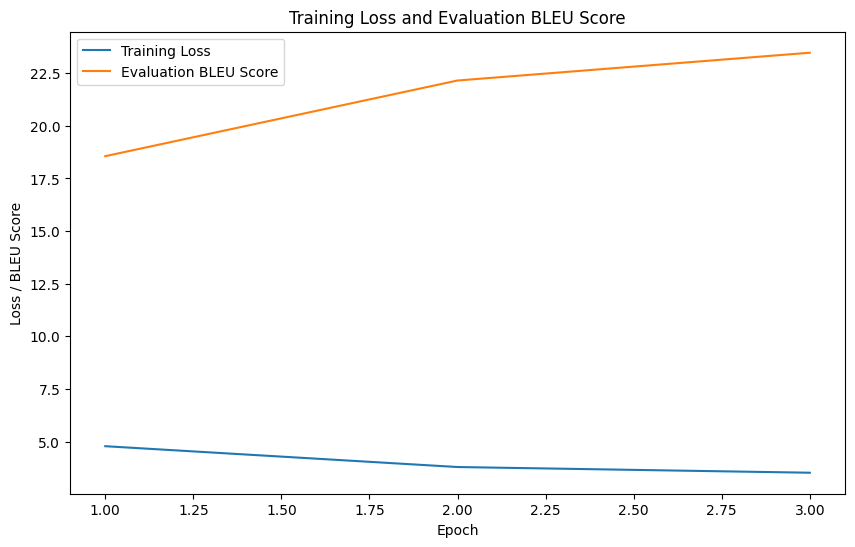

Generating predictions on the test set...
Computing BLEU scores for each test sample...


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


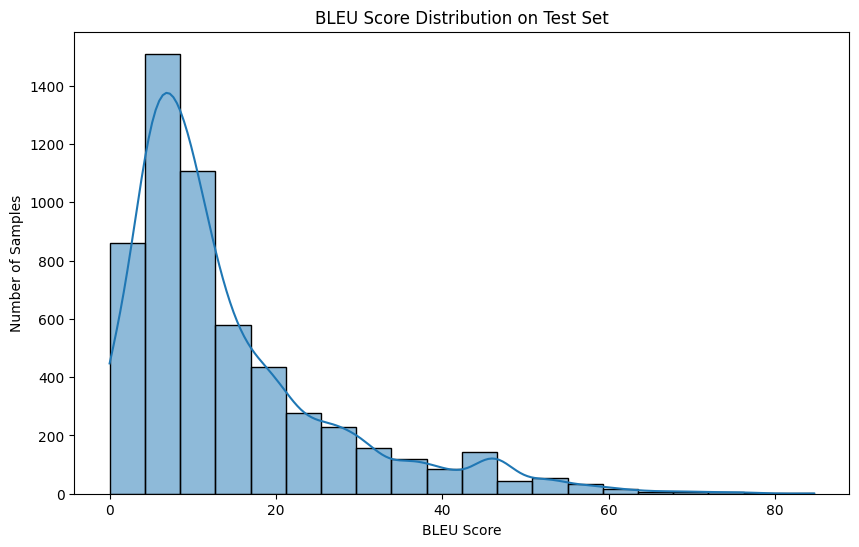

Average BLEU score on test set: 14.16

Sample translations from the test set:

Source: Can I go out with just a jacket today?
Reference: Kya aaj mujhe sirf jacket pehen kar bahar nikalna chahiye?
Prediction: kya kya just ko jacket ke liye I go out kya hai?

Source: play piano music
Reference: piano music play karo
Prediction: piano music play kare

Source: Turn my alarms off now
Reference: Mere alarms ko aab band kare
Prediction: mere alarms ko band karo

Source: Loki’s a likable villain I’d say.
Reference: Main bolunga k Loki ek likable villain hai
Prediction: Loki’s a likable villain I’d say.

Source: Tell me the traffic at 5 pm
Reference: Mujhe sham 5 bajhe traffic ke baare me batao
Prediction: mujhe 5 pm ko traffic kaisa hai

Custom Translation:
Input: I was waiting for my bag
Translated Output: mere bag ke liye was waiting kya hai


In [6]:
# Install necessary packages
!pip install transformers datasets sacrebleu sentencepiece evaluate

# Import necessary libraries
import os
import torch
import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from evaluate import load as load_metric
from transformers import (
    AutoConfig,
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq,
)
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
import random

# Set environment variable to disable parallelism in tokenizers
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Check if GPUs are available and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    n_gpu = torch.cuda.device_count()
    print(f"Using device: {device}")
    print(f"Number of GPUs available: {n_gpu}")
else:
    device = torch.device("cpu")
    n_gpu = 0
    print("No GPU available, using CPU.")

# Set seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if n_gpu > 0:
    torch.cuda.manual_seed_all(seed)

# Initialize model, tokenizer, and config
model_name = "t5-small"
config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    use_fast=True,
)
model = AutoModelForSeq2SeqLM.from_pretrained(
    model_name,
    config=config)

# Move model to device before wrapping with DataParallel
model.to(device)

# Wrap the model with DataParallel
if n_gpu > 1:
    model = torch.nn.DataParallel(model)
    print("Using DataParallel for multi-GPU training.")

# Load the dataset
dataset = load_dataset('findnitai/english-to-hinglish')

# Reduce the dataset size to 30%
sample_fraction = 0.3
dataset = dataset['train'].shuffle(seed=seed).select(range(int(len(dataset['train']) * sample_fraction)))
dataset = datasets.DatasetDict({'train': dataset})

# Prepare tokenizer with additional data
master = []
for line in dataset['train']['translation']:
    master.append(line['en'])
    master.append(line['hi_ng'])

def gen_training_data():
    return (master[i : i+500]
            for i in range(0, len(master), 500)
           )

tokenizer_training_data = gen_training_data()
tokenizer = tokenizer.train_new_from_iterator(tokenizer_training_data, 32128)

# Split the dataset into train and test
raw_datasets = dataset['train'].train_test_split(test_size=0.1, seed=seed)
train_dataset = raw_datasets['train']
eval_dataset = raw_datasets['test']

# Print number of sentences in the datasets
num_train_samples = len(train_dataset)
num_eval_samples = len(eval_dataset)

total_train_sentences = num_train_samples * 2  # Each sample has an English and a Hinglish sentence
total_eval_sentences = num_eval_samples * 2

print(f"Number of training samples: {num_train_samples}")
print(f"Number of evaluation samples: {num_eval_samples}")
print(f"Total number of sentences in training data: {total_train_sentences}")
print(f"Total number of sentences in evaluation data: {total_eval_sentences}")

# Preprocessing parameters
source_prefix = "translate English to Hinglish: "
source_lang = "en"
target_lang = "hi_ng"
max_source_length = 128
max_target_length = 128
padding = "max_length"
num_epochs = 3

# Preprocessing function
def preprocess_function(examples):
    inputs = [ex[source_lang] for ex in examples['translation']]
    targets = [ex[target_lang] for ex in examples['translation']]
    inputs = [source_prefix + inp for inp in inputs]
    model_inputs = tokenizer(inputs, max_length=max_source_length, padding=padding, truncation=True)
    labels = tokenizer(targets, max_length=max_target_length, padding=padding, truncation=True)
    # Replace padding token ids with -100 to ignore in loss computation
    labels["input_ids"] = [
        [(l if l != tokenizer.pad_token_id else -100) for l in label] for label in labels["input_ids"]
    ]
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply preprocessing to datasets
train_dataset = train_dataset.map(preprocess_function, batched=True, remove_columns=["translation"])
eval_dataset = eval_dataset.map(preprocess_function, batched=True, remove_columns=["translation"])

# Data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, padding=True)

# Create DataLoaders
per_device_train_batch_size = 32  # Increase batch size to utilize GPU memory
per_device_eval_batch_size = 32

train_dataloader = DataLoader(train_dataset, shuffle=True, collate_fn=data_collator, batch_size=per_device_train_batch_size)
eval_dataloader = DataLoader(eval_dataset, collate_fn=data_collator, batch_size=per_device_eval_batch_size)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)

num_update_steps_per_epoch = len(train_dataloader)
max_train_steps = num_epochs * num_update_steps_per_epoch

lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=max_train_steps
)

# Metric
metric = load_metric('sacrebleu')

# Function to postprocess text
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels

# Training loop
total_train_loss = []
total_eval_bleu = []

print("Starting training...")
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for step, batch in enumerate(train_dataloader):
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}
        
        outputs = model(**batch)
        loss = outputs.loss  # Loss is a tensor with size [num_gpus]
        
        # Aggregate the loss
        loss_value = loss.mean().item()
        epoch_train_loss += loss_value
        
        # Backward pass on the mean loss
        loss.mean().backward()
        
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        
        if step % 100 == 0:
            current_loss = epoch_train_loss / (step + 1)
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{step}/{len(train_dataloader)}], Loss: {current_loss:.4f}")
    
    avg_train_loss = epoch_train_loss / len(train_dataloader)
    total_train_loss.append(avg_train_loss)
    
    # Evaluate at the end of each epoch
    model.eval()
    all_preds = []
    all_labels = []
    for step, batch in enumerate(eval_dataloader):
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            generated_tokens = model.module.generate(
                batch["input_ids"],
                attention_mask=batch["attention_mask"],
                max_length=max_target_length,
                num_beams=4,
            )
        labels = batch["labels"]
        
        labels = labels.cpu().numpy()
        generated_tokens = generated_tokens.cpu().numpy()
        
        # Replace -100 with pad_token_id
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
        
        decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        
        decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
        
        all_preds.extend(decoded_preds)
        all_labels.extend(decoded_labels)
    
    result = metric.compute(predictions=all_preds, references=all_labels)
    eval_bleu = result["score"]
    print(f"Epoch [{epoch+1}/{num_epochs}], Evaluation BLEU Score: {eval_bleu:.2f}")
    total_eval_bleu.append(eval_bleu)

print("Training completed.")

# Plot training loss and evaluation BLEU score
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), total_train_loss, label='Training Loss')
plt.plot(range(1, num_epochs+1), total_eval_bleu, label='Evaluation BLEU Score')
plt.xlabel('Epoch')
plt.ylabel('Loss / BLEU Score')
plt.title('Training Loss and Evaluation BLEU Score')
plt.legend()
plt.show()

# Generate predictions on the test set
print("Generating predictions on the test set...")
model.eval()
all_preds = []
all_labels = []
for step, batch in enumerate(eval_dataloader):
    # Move batch to device
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        generated_tokens = model.module.generate(
            batch["input_ids"],
            attention_mask=batch["attention_mask"],
            max_length=max_target_length,
            num_beams=4,
        )
    labels = batch["labels"]
    
    labels = labels.cpu().numpy()
    generated_tokens = generated_tokens.cpu().numpy()
    
    # Replace -100 with pad_token_id
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    
    decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    
    all_preds.extend(decoded_preds)
    all_labels.extend(decoded_labels)

# Compute individual BLEU scores
print("Computing BLEU scores for each test sample...")
individual_bleu_scores = []
for pred, label in zip(all_preds, all_labels):
    bleu = metric.compute(predictions=[pred], references=[[label]])
    individual_bleu_scores.append(bleu['score'])

# Plot BLEU score distribution
plt.figure(figsize=(10, 6))
sns.histplot(individual_bleu_scores, bins=20, kde=True)
plt.title('BLEU Score Distribution on Test Set')
plt.xlabel('BLEU Score')
plt.ylabel('Number of Samples')
plt.show()

# Print average BLEU score
average_bleu = np.mean(individual_bleu_scores)
print(f"Average BLEU score on test set: {average_bleu:.2f}")

# Sample translations
print("\nSample translations from the test set:")
for i in range(5):
    input_ids = eval_dataset[i]['input_ids']
    input_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    print(f"\nSource: {input_text.replace(source_prefix, '')}")
    print(f"Reference: {all_labels[i][0]}")
    print(f"Prediction: {all_preds[i]}")

# Function to translate new sentences
def translate_sentence(sentence):
    input_text = source_prefix + sentence
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
    with torch.no_grad():
        generated_tokens = model.module.generate(input_ids, max_length=max_target_length, num_beams=4)
    translated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)
    return translated_text

# Test the model with a custom sentence
custom_sentence = "I was waiting for my bag"
translated_sentence = translate_sentence(custom_sentence)
print("\nCustom Translation:")
print(f"Input: {custom_sentence}")
print(f"Translated Output: {translated_sentence}")


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Using device: cuda
Number of GPUs available: 2
Using DataParallel for multi-GPU training.
Number of training samples: 170191
Number of evaluation samples: 18911
Total number of sentences in training data: 340382
Total number of sentences in evaluation data: 37822


Map:   0%|          | 0/170191 [00:00<?, ? examples/s]

Map:   0%|          | 0/18911 [00:00<?, ? examples/s]

/tmp/ipykernel_30/3373147462.py:160: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Starting training...


/tmp/ipykernel_30/3373147462.py:183: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch [1/5], Step [0/10637], Loss: 4.9462
Epoch [1/5], Step [100/10637], Loss: 4.7178
Epoch [1/5], Step [200/10637], Loss: 4.7198
Epoch [1/5], Step [300/10637], Loss: 4.7011
Epoch [1/5], Step [400/10637], Loss: 4.6676
Epoch [1/5], Step [500/10637], Loss: 4.6191
Epoch [1/5], Step [600/10637], Loss: 4.5696
Epoch [1/5], Step [700/10637], Loss: 4.5184
Epoch [1/5], Step [800/10637], Loss: 4.4672
Epoch [1/5], Step [900/10637], Loss: 4.4117
Epoch [1/5], Step [1000/10637], Loss: 4.3528
Epoch [1/5], Step [1100/10637], Loss: 4.2935
Epoch [1/5], Step [1200/10637], Loss: 4.2312
Epoch [1/5], Step [1300/10637], Loss: 4.1704
Epoch [1/5], Step [1400/10637], Loss: 4.1120
Epoch [1/5], Step [1500/10637], Loss: 4.0497
Epoch [1/5], Step [1600/10637], Loss: 3.9924
Epoch [1/5], Step [1700/10637], Loss: 3.9357
Epoch [1/5], Step [1800/10637], Loss: 3.8802
Epoch [1/5], Step [1900/10637], Loss: 3.8270
Epoch [1/5], Step [2000/10637], Loss: 3.7743
Epoch [1/5], Step [2100/10637], Loss: 3.7250
Epoch [1/5], Step [220

/tmp/ipykernel_30/3373147462.py:216: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/5], Evaluation BLEU Score: 36.91
Epoch [2/5], Step [0/10637], Loss: 1.2476
Epoch [2/5], Step [100/10637], Loss: 1.2060
Epoch [2/5], Step [200/10637], Loss: 1.1979
Epoch [2/5], Step [300/10637], Loss: 1.1930
Epoch [2/5], Step [400/10637], Loss: 1.1922
Epoch [2/5], Step [500/10637], Loss: 1.1871
Epoch [2/5], Step [600/10637], Loss: 1.1818
Epoch [2/5], Step [700/10637], Loss: 1.1801
Epoch [2/5], Step [800/10637], Loss: 1.1822
Epoch [2/5], Step [900/10637], Loss: 1.1819
Epoch [2/5], Step [1000/10637], Loss: 1.1804
Epoch [2/5], Step [1100/10637], Loss: 1.1787
Epoch [2/5], Step [1200/10637], Loss: 1.1734
Epoch [2/5], Step [1300/10637], Loss: 1.1706
Epoch [2/5], Step [1400/10637], Loss: 1.1686
Epoch [2/5], Step [1500/10637], Loss: 1.1628
Epoch [2/5], Step [1600/10637], Loss: 1.1608
Epoch [2/5], Step [1700/10637], Loss: 1.1577
Epoch [2/5], Step [1800/10637], Loss: 1.1565
Epoch [2/5], Step [1900/10637], Loss: 1.1525
Epoch [2/5], Step [2000/10637], Loss: 1.1503
Epoch [2/5], Step [2100/1

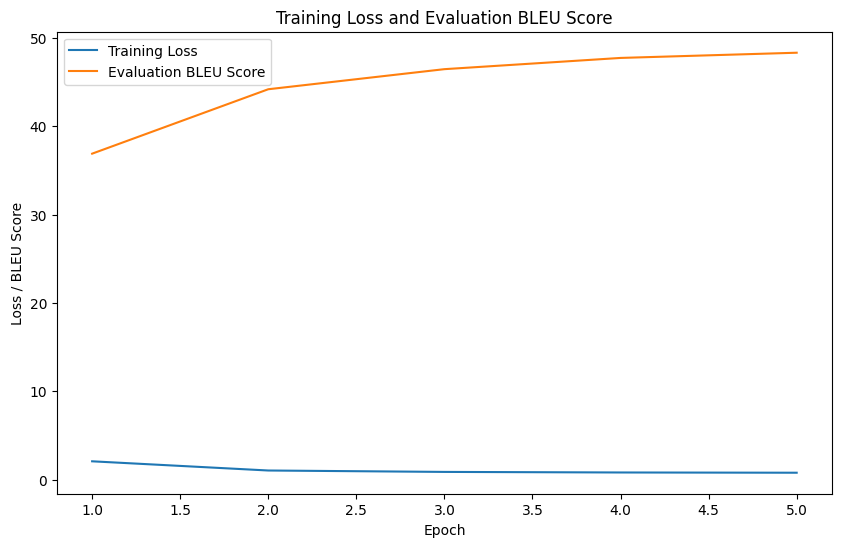

Generating predictions on the test set...


/tmp/ipykernel_30/3373147462.py:268: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Computing BLEU scores for each test sample...


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


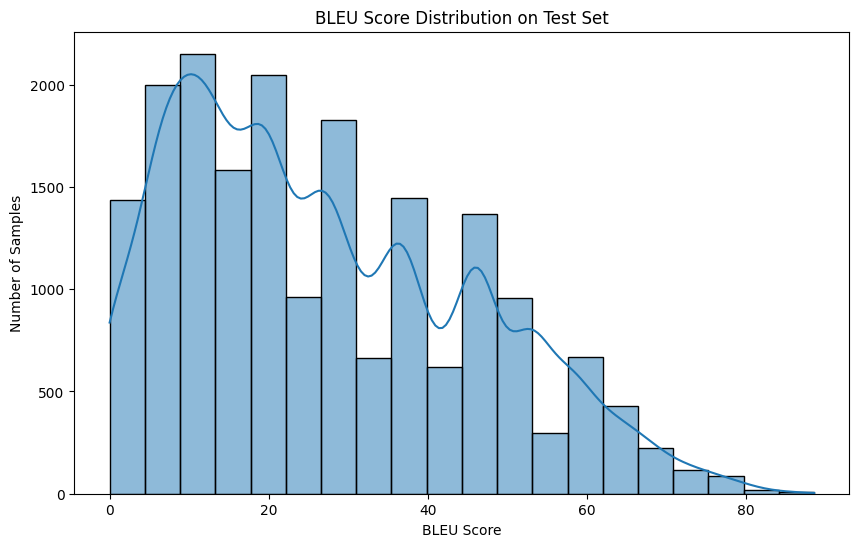

Average BLEU score on test set: 26.98

Sample translations from the test set:

Source: delete all recurring alarms
Reference: sarey recurring alarms delete karo
Prediction: sabhi recurring alarms delete kare

Source: what is the best route to the racetrack from my sister's house, if i left around 2 pm?
Reference: agar mai 2 pm ke aas paas nikal jaoon to meri sister ke ghar se racetrack tak pahunchne ke liye sabse best route konsa hai?
Prediction: agar mai 2 pm ko nikalta hoon toh mere sister ke ghar se racetrack tak sabse acha route kya hai?

Source: play the top 40 songs right now
Reference: top 40 songs ko abhi play kare
Prediction: abhi top 40 songs bajao

Source: i want to cancel that alarm
Reference: mai wo alarm cancel karna chahta hoon
Prediction: mai ye alarm cancel karna chahta hoon

Source: alert me at 6 tomorrow instead of 7 am.
Reference: mujhe kal 7 am ke bajaye 6 ko alert kare
Prediction: mujhe kal subah 6 baje subah 7 baje ke liye alert kare


/tmp/ipykernel_30/3373147462.py:328: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():



Custom Translation:
Input: I was waiting for my bag
Translated Output: mujhe mere bag ke liye waiting karne ke liye
Allocated GPU memory: 3.36 GB
Cached GPU memory: 7.98 GB


In [7]:
# Install necessary packages
!pip install transformers datasets sacrebleu sentencepiece evaluate

# Import necessary libraries
import os
import torch
import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from evaluate import load as load_metric
from transformers import (
    AutoConfig,
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq,
)
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
import random

# Set environment variable to disable parallelism in tokenizers
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Check if GPUs are available and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    n_gpu = torch.cuda.device_count()
    print(f"Using device: {device}")
    print(f"Number of GPUs available: {n_gpu}")
else:
    device = torch.device("cpu")
    n_gpu = 0
    print("No GPU available, using CPU.")

# Set seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if n_gpu > 0:
    torch.cuda.manual_seed_all(seed)

# Initialize model, tokenizer, and config
model_name = "t5-small"  # Keep t5-small due to memory constraints
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
config = AutoConfig.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, config=config)

# Move model to device before wrapping with DataParallel
model.to(device)

# Wrap the model with DataParallel if multiple GPUs are available
if n_gpu > 1:
    model = torch.nn.DataParallel(model)
    print("Using DataParallel for multi-GPU training.")

# Load the dataset
dataset = load_dataset('findnitai/english-to-hinglish')

# Use the full dataset (adjust if necessary)
dataset = dataset['train']

# If memory is a concern, consider sampling a fraction of the dataset
# sample_fraction = 0.7  # Adjust the fraction as needed
# dataset = dataset.shuffle(seed=seed).select(range(int(len(dataset) * sample_fraction)))

# Convert to DatasetDict
dataset = datasets.DatasetDict({'train': dataset})

# Split the dataset into train and test
raw_datasets = dataset['train'].train_test_split(test_size=0.1, seed=seed)
train_dataset = raw_datasets['train']
eval_dataset = raw_datasets['test']

# Print number of sentences in the datasets
num_train_samples = len(train_dataset)
num_eval_samples = len(eval_dataset)

total_train_sentences = num_train_samples * 2  # Each sample has an English and a Hinglish sentence
total_eval_sentences = num_eval_samples * 2

print(f"Number of training samples: {num_train_samples}")
print(f"Number of evaluation samples: {num_eval_samples}")
print(f"Total number of sentences in training data: {total_train_sentences}")
print(f"Total number of sentences in evaluation data: {total_eval_sentences}")

# Preprocessing parameters
source_prefix = "translate English to Hinglish: "
source_lang = "en"
target_lang = "hi_ng"
max_source_length = 128
max_target_length = 128
padding = "max_length"
num_epochs = 5  # Increased number of epochs
gradient_accumulation_steps = 2  # Adjust as needed

# Preprocessing function with data cleaning
def preprocess_function(examples):
    inputs = [ex[source_lang].lower().strip() for ex in examples['translation']]
    targets = [ex[target_lang].lower().strip() for ex in examples['translation']]
    # Remove unwanted characters or punctuation if necessary
    # You can add regex or other string processing here

    inputs = [source_prefix + inp for inp in inputs]
    model_inputs = tokenizer(inputs, max_length=max_source_length, padding=padding, truncation=True)
    labels = tokenizer(targets, max_length=max_target_length, padding=padding, truncation=True)

    # Replace padding token ids with -100 so they are ignored in the loss computation
    labels["input_ids"] = [
        [(l if l != tokenizer.pad_token_id else -100) for l in label]
        for label in labels["input_ids"]
    ]
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply preprocessing to datasets
train_dataset = train_dataset.map(preprocess_function, batched=True, remove_columns=["translation"])
eval_dataset = eval_dataset.map(preprocess_function, batched=True, remove_columns=["translation"])

# Data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, padding=True)

# Create DataLoaders with adjusted batch size
per_device_train_batch_size = 16  # Adjust based on memory constraints
per_device_eval_batch_size = 32  # Evaluation can often use larger batch sizes

train_dataloader = DataLoader(
    train_dataset,
    shuffle=True,
    collate_fn=data_collator,
    batch_size=per_device_train_batch_size,
)

eval_dataloader = DataLoader(
    eval_dataset,
    collate_fn=data_collator,
    batch_size=per_device_eval_batch_size,
)

# Optimizer and Scheduler with adjusted learning rate
optimizer = AdamW(model.parameters(), lr=3e-5)

# Total number of training steps
total_steps = (
    len(train_dataloader) // gradient_accumulation_steps * num_epochs
)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),
    num_training_steps=total_steps,
)

# Initialize GradScaler for mixed precision
from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler()

# Metric
metric = load_metric('sacrebleu')

# Function to postprocess text
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels

# Training loop with gradient accumulation and mixed precision
total_train_loss = []
total_eval_bleu = []

print("Starting training...")
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    optimizer.zero_grad()
    for step, batch in enumerate(train_dataloader):
        batch = {k: v.to(device) for k, v in batch.items()}

        with autocast():
            outputs = model(**batch)
            loss = outputs.loss
            loss = loss.mean() / gradient_accumulation_steps  # Normalize loss

        scaler.scale(loss).backward()

        if (step + 1) % gradient_accumulation_steps == 0 or (step + 1) == len(train_dataloader):
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            scheduler.step()

        loss_value = loss.item() * gradient_accumulation_steps  # Multiply back for logging
        epoch_train_loss += loss_value

        if step % 100 == 0:
            current_loss = epoch_train_loss / (step + 1)
            print(
                f"Epoch [{epoch+1}/{num_epochs}], Step [{step}/{len(train_dataloader)}], Loss: {current_loss:.4f}"
            )

    avg_train_loss = epoch_train_loss / len(train_dataloader)
    total_train_loss.append(avg_train_loss)

    # Evaluate at the end of each epoch
    model.eval()
    all_preds = []
    all_labels = []
    for step, batch in enumerate(eval_dataloader):
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            # Use autocast during evaluation as well
            with autocast():
                generated_tokens = model.module.generate(
                    batch["input_ids"],
                    attention_mask=batch["attention_mask"],
                    max_length=max_target_length,
                    num_beams=4,
                )
        labels = batch["labels"]

        labels = labels.cpu().numpy()
        generated_tokens = generated_tokens.cpu().numpy()

        # Replace -100 with pad_token_id
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

        decoded_preds = tokenizer.batch_decode(
            generated_tokens, skip_special_tokens=True
        )
        decoded_labels = tokenizer.batch_decode(
            labels, skip_special_tokens=True
        )

        decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

        all_preds.extend(decoded_preds)
        all_labels.extend(decoded_labels)

    result = metric.compute(predictions=all_preds, references=all_labels)
    eval_bleu = result["score"]
    print(f"Epoch [{epoch+1}/{num_epochs}], Evaluation BLEU Score: {eval_bleu:.2f}")
    total_eval_bleu.append(eval_bleu)

print("Training completed.")

# Plot training loss and evaluation BLEU score
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), total_train_loss, label="Training Loss")
plt.plot(range(1, num_epochs + 1), total_eval_bleu, label="Evaluation BLEU Score")
plt.xlabel("Epoch")
plt.ylabel("Loss / BLEU Score")
plt.title("Training Loss and Evaluation BLEU Score")
plt.legend()
plt.show()

# Generate predictions on the test set
print("Generating predictions on the test set...")
model.eval()
all_preds = []
all_labels = []
for step, batch in enumerate(eval_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        with autocast():
            generated_tokens = model.module.generate(
                batch["input_ids"],
                attention_mask=batch["attention_mask"],
                max_length=max_target_length,
                num_beams=4,
            )
    labels = batch["labels"]

    labels = labels.cpu().numpy()
    generated_tokens = generated_tokens.cpu().numpy()

    # Replace -100 with pad_token_id
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    decoded_preds = tokenizer.batch_decode(
        generated_tokens, skip_special_tokens=True
    )
    decoded_labels = tokenizer.batch_decode(
        labels, skip_special_tokens=True
    )

    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    all_preds.extend(decoded_preds)
    all_labels.extend(decoded_labels)

# Compute individual BLEU scores
print("Computing BLEU scores for each test sample...")
individual_bleu_scores = []
for pred, label in zip(all_preds, all_labels):
    bleu = metric.compute(predictions=[pred], references=[[label]])
    individual_bleu_scores.append(bleu["score"])

# Plot BLEU score distribution
plt.figure(figsize=(10, 6))
sns.histplot(individual_bleu_scores, bins=20, kde=True)
plt.title("BLEU Score Distribution on Test Set")
plt.xlabel("BLEU Score")
plt.ylabel("Number of Samples")
plt.show()

# Print average BLEU score
average_bleu = np.mean(individual_bleu_scores)
print(f"Average BLEU score on test set: {average_bleu:.2f}")

# Sample translations
print("\nSample translations from the test set:")
for i in range(5):
    input_ids = eval_dataset[i]["input_ids"]
    input_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    print(f"\nSource: {input_text.replace(source_prefix, '')}")
    print(f"Reference: {all_labels[i][0]}")
    print(f"Prediction: {all_preds[i]}")

# Function to translate new sentences
def translate_sentence(sentence):
    input_text = source_prefix + sentence.lower().strip()
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
    with torch.no_grad():
        with autocast():
            generated_tokens = model.module.generate(
                input_ids,
                max_length=max_target_length,
                num_beams=4,
            )
    translated_text = tokenizer.decode(
        generated_tokens[0], skip_special_tokens=True
    )
    return translated_text

# Test the model with a custom sentence
custom_sentence = "I was waiting for my bag"
translated_sentence = translate_sentence(custom_sentence)
print("\nCustom Translation:")
print(f"Input: {custom_sentence}")
print(f"Translated Output: {translated_sentence}")

# Optional: Monitor GPU Memory Usage
print(f"Allocated GPU memory: {torch.cuda.memory_allocated() / 1024 ** 3:.2f} GB")
print(f"Cached GPU memory: {torch.cuda.memory_reserved() / 1024 ** 3:.2f} GB")


In [ ]:
custom_sentence = "i should go to school"
translated_sentence = translate_sentence(custom_sentence)
print("\nCustom Translation:")
print(f"Input: {custom_sentence}")
print(f"Translated Output: {translated_sentence}")
